In [7]:
! pip install networkx osmnx matplotlib scipy

  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import osmnx as ox

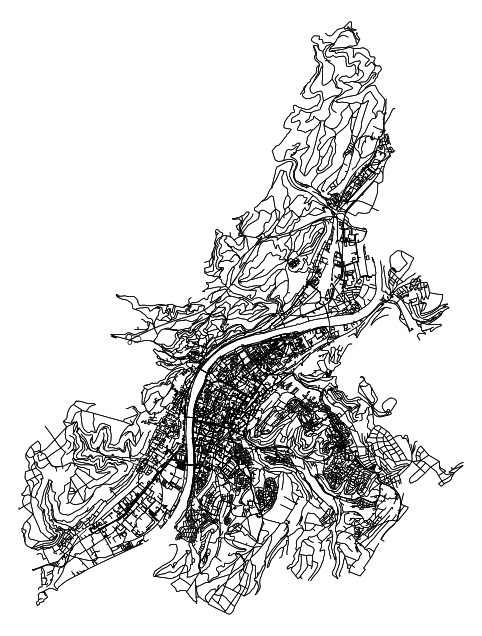

In [31]:
import osmnx as ox
import matplotlib.pyplot as plt

# Download the graph for Trier, Germany
G = ox.graph_from_place("Trier, Germany", network_type='all')

# Set up the plot with the desired configurations
fig, ax = ox.plot_graph(
    G,
    node_size=0,          # Hide the nodes
    node_alpha=0,         # Full transparency for nodes (invisible)
    node_color='none',    # Eliminating node color
    edge_color='black',   # Use black color for the edges
    edge_linewidth=0.5,   # Adjust line width (thicker or thinner as needed)
    bgcolor='white',      # Set background color to white
    show=False,           # Stop automatic display to apply further adjustments
    close=False           # Keep the plot open for adjustments (such as the white face color)
)

# Set the figure's background color to white if necessary
fig.patch.set_facecolor('white')  # Ensure complete white background

# Show the final figure
plt.show()

In [ ]:
city = "Trier, Germany"

G =  ox.graph_from_place(city, network_type='drive', custom_filter='["highway"~"primary|secondary|residential|motorway"]')


In [4]:
# city = "Trier, Germany"

# G =  ox.graph_from_place(city, network_type='drive', custom_filter='["highway"~"primary|secondary|tertiary|residential|motorway|living_street|pedestrian"]')


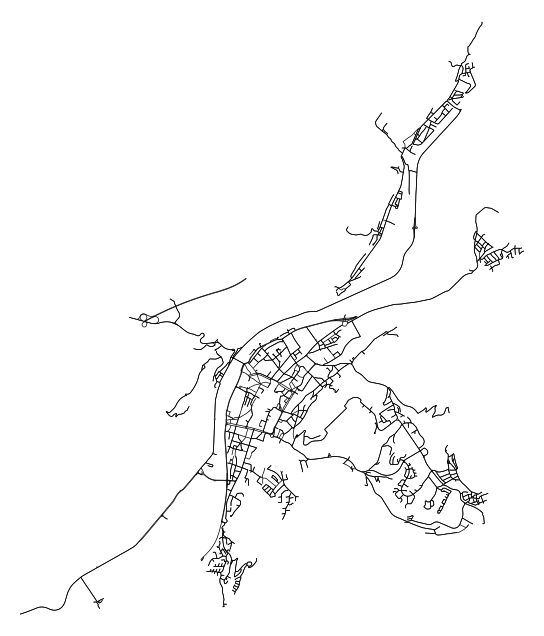

In [7]:
import osmnx as ox
import matplotlib.pyplot as plt

# Assuming `G` is your graph object
fig, ax = ox.plot_graph(
    G,
    node_size=0,  # No nodes
    node_alpha=0,  # Make nodes completely transparent if they exist
    node_color='none',  # Alternatively, set node color to 'none'
    bgcolor='white',  # White background for the plot
    edge_color='black',  # Black edges to contrast
    edge_linewidth=0.5,  # Adjust the edge line width if needed
    show=False,  # Do not show the plot yet
    close=False  # Keep it open to adjust
)

# Adjust plot aesthetics: Set the face color to white (in case you added other background colors before plotting)
fig.patch.set_facecolor('white')  # Set figure background to white if needed

# Now show plot
plt.show()

In [10]:
# Get node coordinates
nodes, edges = ox.graph_to_gdfs(G)
nodes = nodes[['y', 'x']]  # Only keep coordinates for simplicity
print(nodes.head())
print(nodes.shape)

                  y         x
osmid                        
10602396  49.750094  6.637228
10602410  49.749518  6.640148
10602412  49.753861  6.642500
10602431  49.754348  6.644230
10602432  49.753833  6.645809
(1466, 2)


In [11]:
import networkx as nx
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Convert to a dense matrix if needed
dense_matrix = adj_matrix.todense()

print(dense_matrix)
print(dense_matrix.shape)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1466, 1466)


In [12]:
# Save the adjacency matrix to a file
import numpy as np
np.savetxt("adjacency_matrix.csv", dense_matrix, delimiter=",")
nodes.to_csv("node_coordinates.csv")

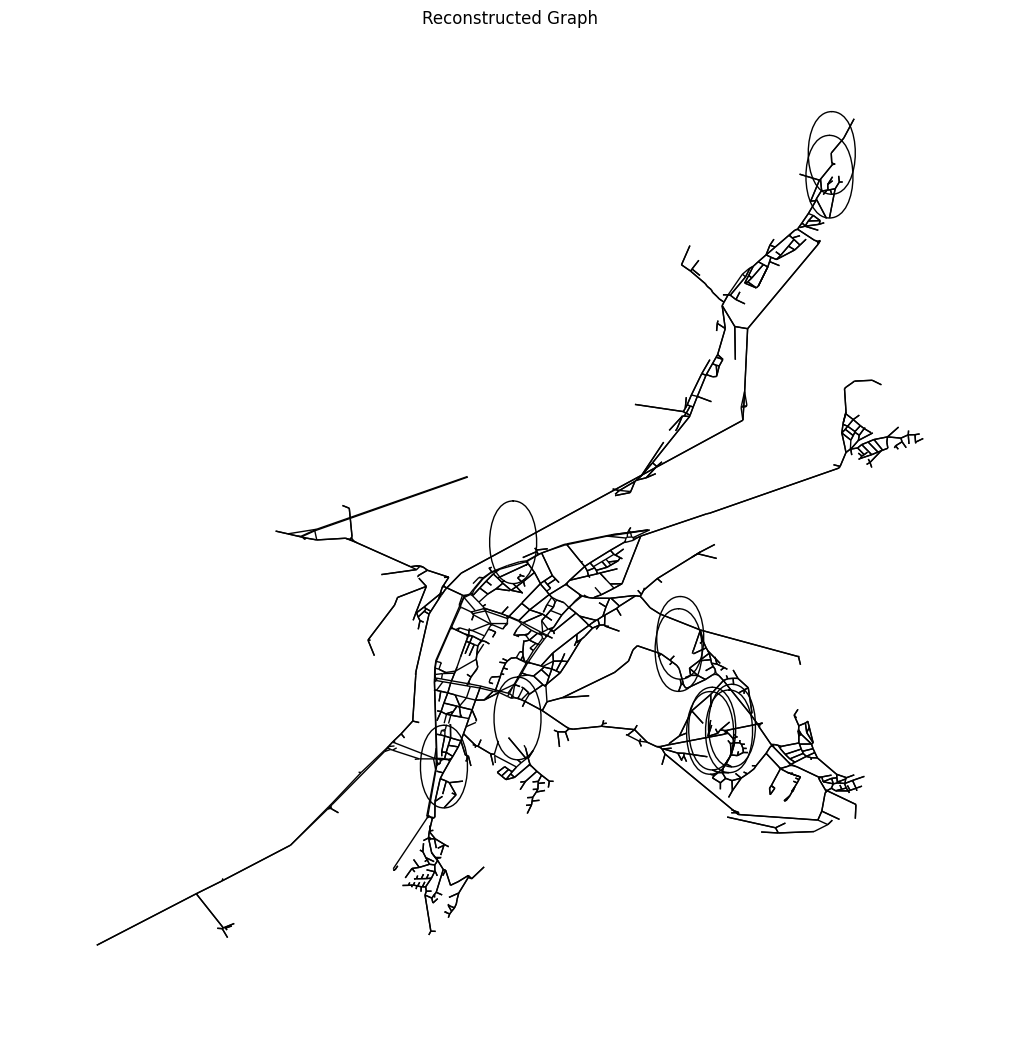

In [5]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("node_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Add coordinates to nodes
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(reconstructed_G, {node_id: {'y': node_data['y'], 'x': node_data['x']}})

# Extract the positions dictionary for node placement
positions = {node_id: (data['x'], data['y']) for node_id, data in loaded_nodes.iterrows()}

# Plot the graph using NetworkX without nodes and labels
plt.figure(figsize=(10, 10), facecolor='black')
nx.draw(reconstructed_G, pos=positions, with_labels=False, arrows=False, node_size=0, edge_color='black')
plt.title('Reconstructed Graph', color='black')
plt.show()

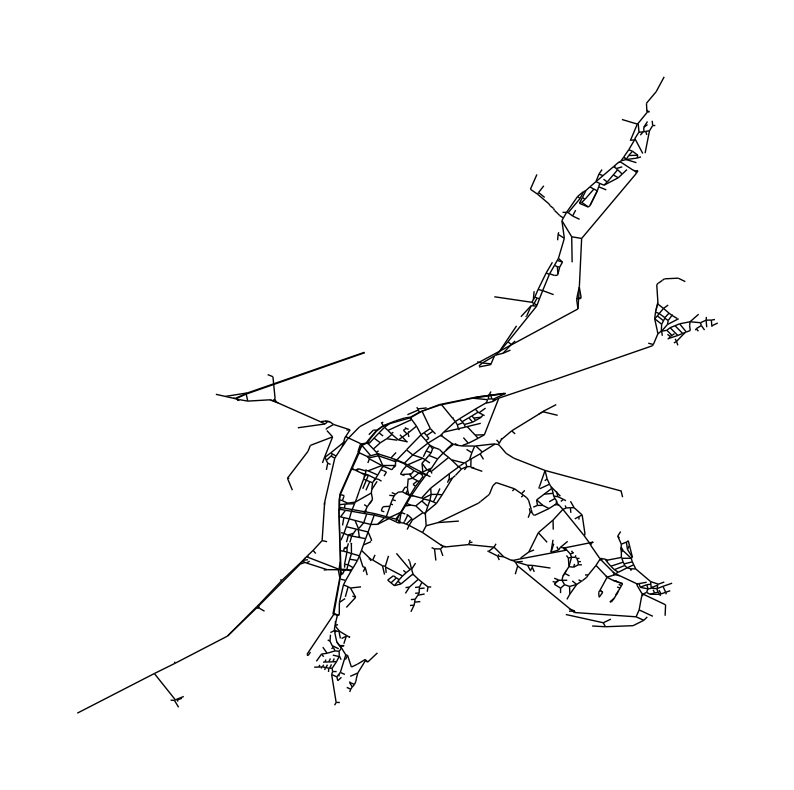

In [14]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("node_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Remove self-loops
self_loops = list(nx.selfloop_edges(reconstructed_G))
reconstructed_G.remove_edges_from(self_loops)

# Removing multi-edges (keeping only one edge between nodes)
simplified_G = nx.Graph(reconstructed_G)  # convert to simple graph removing multi-edges

# Add coordinates to nodes
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(simplified_G, {node_id: {'y': node_data['y'], 'x': node_data['x']}})

# Extract the positions dictionary for node placement
positions = {node_id: (data['x'], data['y']) for node_id, data in loaded_nodes.iterrows()}

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')
fig.patch.set_facecolor('black')

# Draw the graph without self-loops/multi-edges and with improved visibility
nx.draw(
    simplified_G, pos=positions, with_labels=False, arrows=False,
    node_size=0, edge_color='black', width=1, ax=ax
)

# Adjust the plot aesthetics
plt.axis('off')
plt.show()

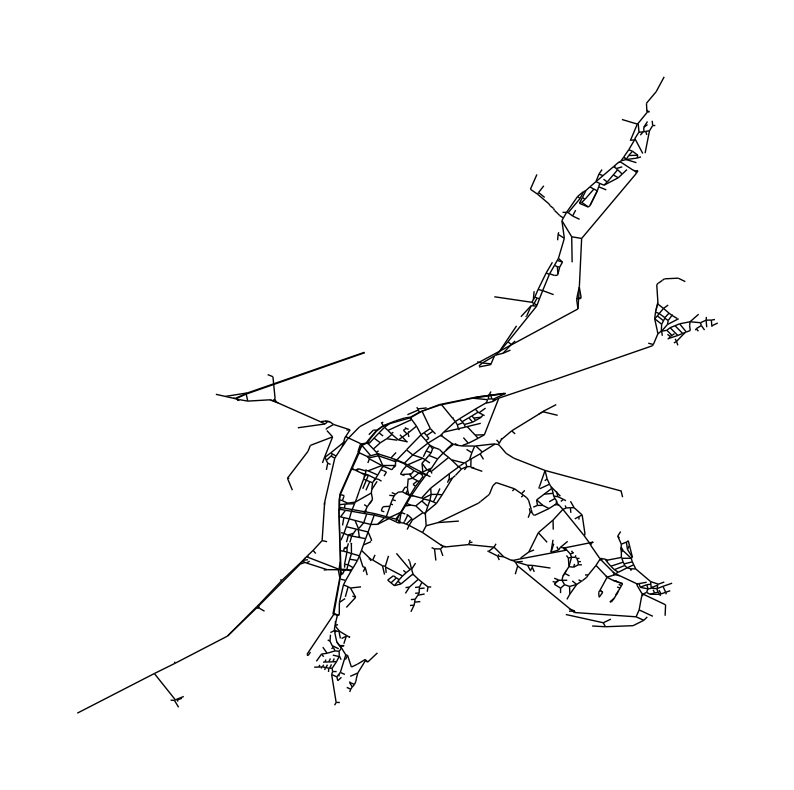

In [32]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("transformed_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Remove self-loops
self_loops = list(nx.selfloop_edges(reconstructed_G))
reconstructed_G.remove_edges_from(self_loops)

# Removing multi-edges (keeping only one edge between nodes)
simplified_G = nx.Graph(reconstructed_G)  # convert to simple graph removing multi-edges

# Add coordinates to nodes
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(simplified_G, {node_id: {'y': node_data['y_inv'], 'x': node_data['x_inv']}})

# Extract the positions dictionary for node placement
positions = {node_id: (data['x'], data['y']) for node_id, data in loaded_nodes.iterrows()}

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')
fig.patch.set_facecolor('black')

# Draw the graph without self-loops/multi-edges and with improved visibility
nx.draw(
    simplified_G, pos=positions, with_labels=False, arrows=False,
    node_size=0, edge_color='black', width=1, ax=ax
)

# Adjust the plot aesthetics
plt.axis('off')
plt.show()

Nodes missing positions (skipped): {1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465}
Remaining nodes in graph: 1445


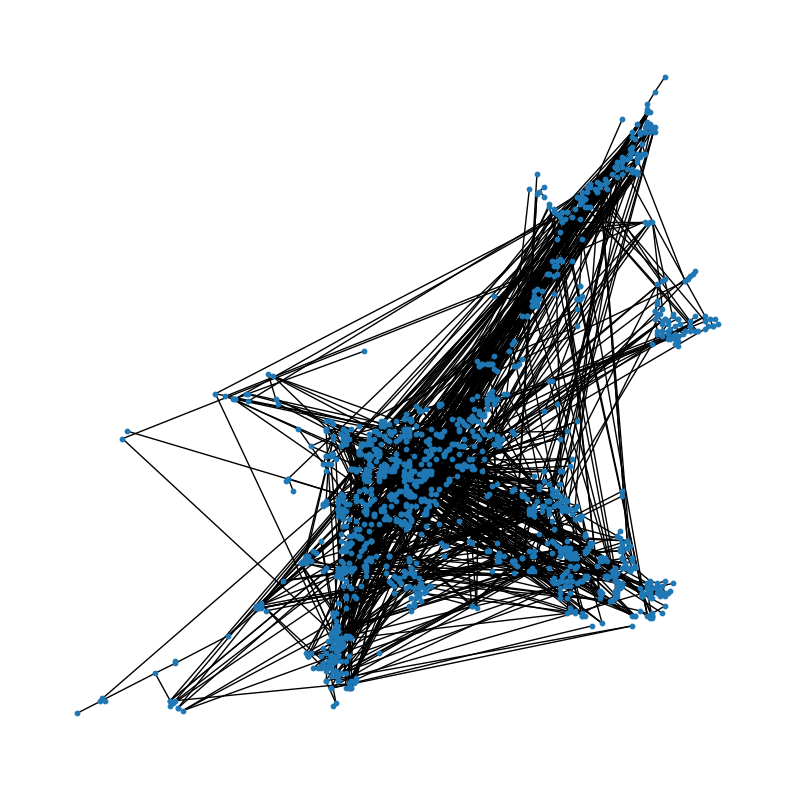

In [28]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("transformed_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Remove self-loops
self_loops = list(nx.selfloop_edges(reconstructed_G))
reconstructed_G.remove_edges_from(self_loops)

# Removing multi-edges (convert to a simple undirected graph since this removes duplicate/multi-edges)
simplified_G = nx.Graph(reconstructed_G)

# Add the coordinates (use `x_inv` and `y_inv` as column names)
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(simplified_G, {node_id: {'y': node_data['y_inv'], 'x': node_data['x_inv']}})

# Extract the positions dictionary based on valid coordinates
existing_positions = {node_id: (data['x_inv'], data['y_inv']) for node_id, data in loaded_nodes.iterrows()}

# Filter out nodes that are missing positions
nodes_in_graph = set(simplified_G.nodes())
nodes_with_positions = set(existing_positions.keys())

# Find the nodes in the graph that are missing positions and remove them from the graph
nodes_missing_positions = nodes_in_graph - nodes_with_positions

if nodes_missing_positions:
    print(f"Nodes missing positions (skipped): {nodes_missing_positions}")
    # Remove nodes without positions
    simplified_G.remove_nodes_from(nodes_missing_positions)

# Verify final number of nodes in the graph are now consistent with positions
print(f"Remaining nodes in graph: {len(simplified_G.nodes())}")

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')
fig.patch.set_facecolor('black')

# Draw the final graph with nodes and their positions
nx.draw(
    simplified_G, pos=existing_positions, with_labels=False, arrows=False,
    node_size=10, edge_color='black', width=1, ax=ax
)

# Adjust plot aesthetics
plt.axis('off')  # Turn off the axis
plt.show()

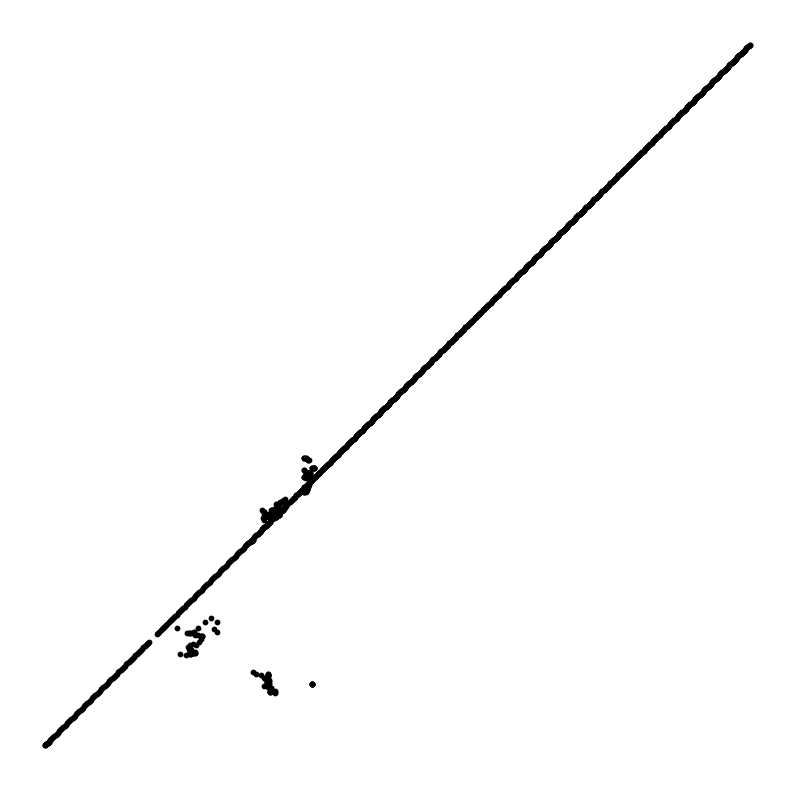

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load node coordinates (using y_inv and x_inv from the CSV file)
loaded_nodes = pd.read_csv("transformed_coordinates_synthetic.csv", index_col=0)

# Extract x and y coordinates
x_coords = loaded_nodes['x_inv']
y_coords = loaded_nodes['y_inv']

# Set up plot with white background (default)
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot of coordinates (use a black marker this time)
ax.scatter(x_coords, y_coords, s=10, c='black', marker='o')  # s=10 is the marker size, c='black' sets the marker color

# Adjust plot aesthetics
plt.gca().set_facecolor('white')  # Optionally, set background color to white (it's default)
plt.axis('off')  # Hide axes
plt.show()  # Display the plot